In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
data = pd.read_csv('/Users/natimarcus/Desktop/DAT-06-24/class material/Unit 3/data/advertising.csv', index_col = 0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
sm.stats.ztest(data['radio'], data['newspaper']) # -3.9 is z-score, 0.00000917 is p-value

(-3.911403345381785, 9.176137849809707e-05)

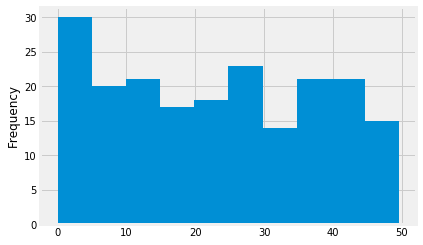

In [12]:
data['radio'].plot(kind='hist')

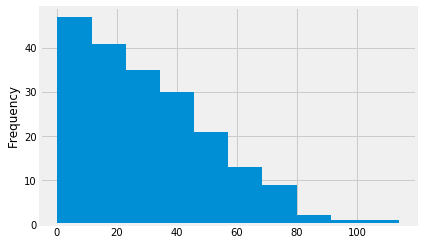

In [11]:
data['newspaper'].plot(kind='hist')

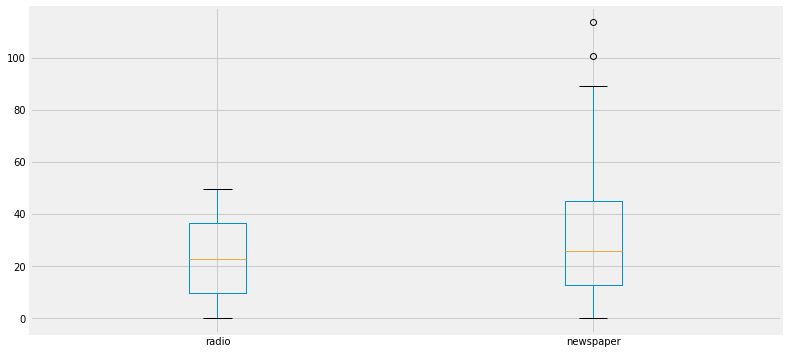

In [14]:
data[['radio', 'newspaper']].plot(kind='box', figsize=(12,6));

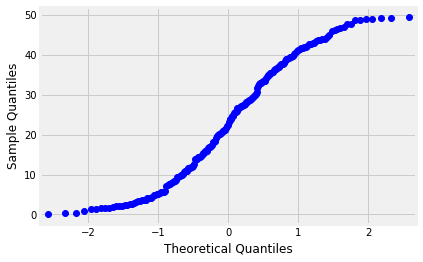

In [15]:
from statsmodels.graphics.gofplots import qqplot
x = qqplot(data['radio'])

#normal dist should be straight diagonal from bottom left to top right

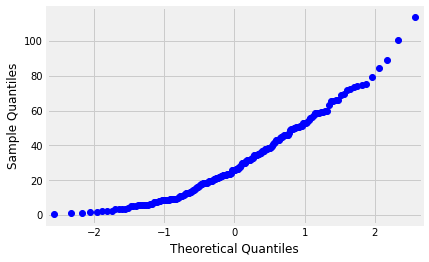

In [17]:
x = qqplot(data['newspaper'])

In [36]:
from scipy.stats import shapiro

test_statistic, p_value = shapiro(data['radio'])
print("Shapiro test statistic:", test_statistic, " ", "P-value:", p_value)

#null hypothesis for this test: data is normally distributed
#p-value says how likely it is that the distribution is normal
#there is 0.000005% chance that this distribution is normal

Shapiro test statistic: 0.9440046548843384   P-value: 5.196915822125447e-07


In [38]:
from scipy.stats import kstest

radio_data = (data['radio'] - data['radio'].mean()) / data['radio'].std()
test_stat, p_value = kstest(radio_data, cdf='norm')
print("KS Test Statistic:", test_stat, " ", "P Value:", p_value)

#p-value is prob that the dist is normal

KS Test Statistic: 0.08395825811656044   P Value: 0.11261277203399504


In [58]:
data1 = [0] * 50
data1.extend(np.random.normal(14,4,150))
np.random.shuffle(data1)

data2 = [0] * 100
data2.extend(np.random.normal(20,5,100))
np.random.shuffle(data2)

df = pd.DataFrame()
df['A'] = data1
df['B'] = data2

In [59]:
sm.stats.ztest(df['A'], df['B'])
#p-value here is 0.48

(0.709317669332808, 0.4781273659387377)

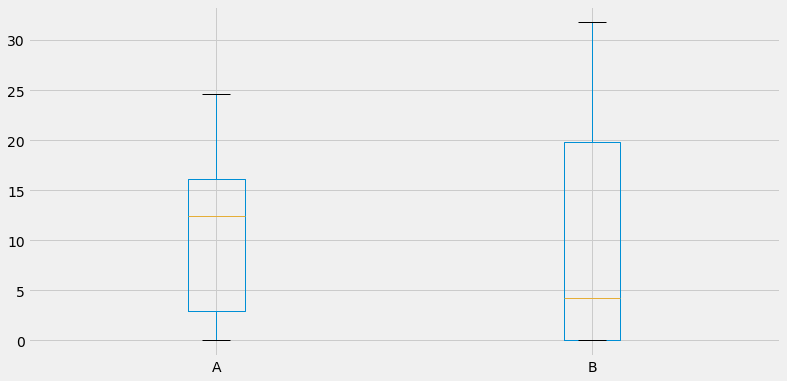

In [60]:
df[['A', 'B']].plot(kind='box', figsize=(12,6));

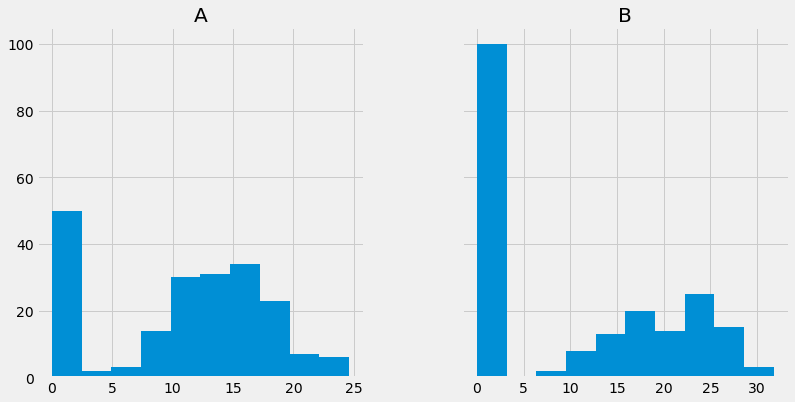

In [70]:
df.hist(sharey=True, figsize=(12,6));

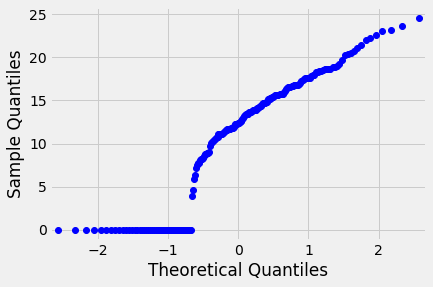

In [63]:
x = qqplot(df['A'])

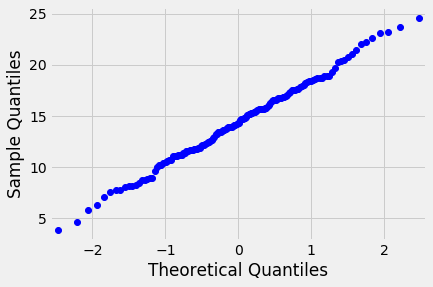

In [72]:
x = qqplot(df[df.A > 0]['A'])
#excluding zero makes the data pretty normal

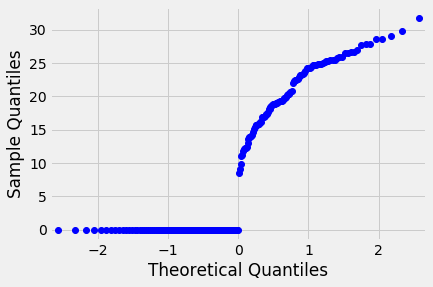

In [64]:
x = qqplot(df['B'])

In [65]:
test_statistic, p_value = shapiro(df['A'])
print("Shapiro test statistic:", test_statistic, " ", "P-value:", p_value)

Shapiro test statistic: 0.8894510865211487   P-value: 5.6278502691409216e-11


In [73]:
test_statistic, p_value = shapiro(df[df.A > 0]['A'])
print("Shapiro test statistic:", test_statistic, " ", "P-value:", p_value)

#95% chance the dist is normal when 0 isn't included

Shapiro test statistic: 0.9958558678627014   P-value: 0.9508972764015198


In [66]:
test_statistic, p_value = shapiro(df['B'])
print("Shapiro test statistic:", test_statistic, " ", "P-value:", p_value)

Shapiro test statistic: 0.7879025936126709   P-value: 9.458063062665716e-16


In [67]:
radio_data = (df['A'] - df['A'].mean()) / df['A'].std()
test_stat, p_value = kstest(radio_data, cdf='norm')
print("KS Test Statistic:", test_stat, " ", "P Value:", p_value)

KS Test Statistic: 0.1839122919348457   P Value: 2.1534601643905213e-06


In [68]:
radio_data = (df['B'] - df['B'].mean()) / df['B'].std()
test_stat, p_value = kstest(radio_data, cdf='norm')
print("KS Test Statistic:", test_stat, " ", "P Value:", p_value)

KS Test Statistic: 0.3253678948828077   P Value: 2.376480126588965e-19


In [74]:
from scipy.stats import ttest_ind
test_stat, p_value = ttest_ind(df['A'], df['B'], equal_var=False)
print(test_stat, p_value)

0.709317669332808 0.47860614582687355


In [75]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(data['radio'], data['TV'], data['newspaper'])
print(test_stat, p_value)

358.8514595342596 4.552931539744962e-103


In [76]:
from scipy.stats import kruskal

test_stat, p_value = kruskal(data['radio'], data['TV'], data['newspaper'])
print(test_stat, p_value)

257.66637166931656 1.1180424828789922e-56
